# These are all the packages you need to import to run the code. 
The other packages will be mentioned as required.

In [234]:
from dike_model_function import DikeNetwork
import dike_model_optimization
import dike_model_simulation
import problem_formulation
from ema_workbench import Policy, perform_experiments, optimize
from ema_workbench import ema_logging
import ema_workbench
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [235]:
model = problem_formulation.get_model_for_problem_formulation(3)
ema_logging.log_to_stderr(ema_logging.INFO)
n_scenarios = 100
n_policies = 100

[MainProcess/INFO] model initialized


In [236]:
len(model.outcomes.keys())

17

In [377]:
policies = [
Policy( "RfR 0", ** {'A.1_DikeIncrease': 0,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 0,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 0, 'EWS_DaysToThreat': 0, '0_RfR': 1,  '1_RfR': 0,  '2_RfR': 0,  '3_RfR': 0,  '4_RfR': 1}),
Policy( "RfR 1", ** {'A.1_DikeIncrease': 0,'A.2_DikeIncrease': 10,'A.3_DikeIncrease': 0,'A.4_DikeIncrease': 0,'A.5_DikeIncrease': 10, 'EWS_DaysToThreat': 1, '0_RfR': 0,  '1_RfR': 1,  '2_RfR': 0,  '3_RfR': 0,  '4_RfR': 0}),
Policy( "RfR 2", ** {'A.1_DikeIncrease': 0,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 10,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 10, 'EWS_DaysToThreat': 2, '0_RfR': 0,  '1_RfR': 0,  '2_RfR': 1,  '3_RfR': 0,  '4_RfR': 0}),
Policy( "RfR 3", ** {'A.1_DikeIncrease': 10,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 10,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 0, 'EWS_DaysToThreat': 3, '0_RfR': 0,  '1_RfR': 1,  '2_RfR': 0,  '3_RfR': 1,  '4_RfR': 0}),
Policy( "RfR 4", ** {'A.1_DikeIncrease': 10,'A.2_DikeIncrease': 10,'A.3_DikeIncrease': 0,'A.4_DikeIncrease': 0,'A.5_DikeIncrease': 10, 'EWS_DaysToThreat': 4, '0_RfR': 1,  '1_RfR': 1,  '2_RfR': 1,  '3_RfR': 1,  '4_RfR': 1}),
Policy( "RfR 5", ** {'A.1_DikeIncrease': 10,'A.2_DikeIncrease': 0,'A.3_DikeIncrease': 10,'A.4_DikeIncrease': 10,'A.5_DikeIncrease': 0, 'EWS_DaysToThreat': 1, '0_RfR': 1,  '1_RfR': 1,  '2_RfR': 1,  '3_RfR': 1,  '4_RfR': 1})    
]    

## The six policies that are specified are run over 100 scenarios creating 600 experimental runs of the model

In [238]:
results = perform_experiments(model, n_scenarios, policies = policies)

[MainProcess/INFO] performing 100 scenarios * 6 policies * 1 model(s) = 600 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 420 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 540 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] experiments finished


In [239]:
experiments, outcomes = results

## All the 17 outcomes are plotted against each other in order to understand the relations of each outcome with the other  

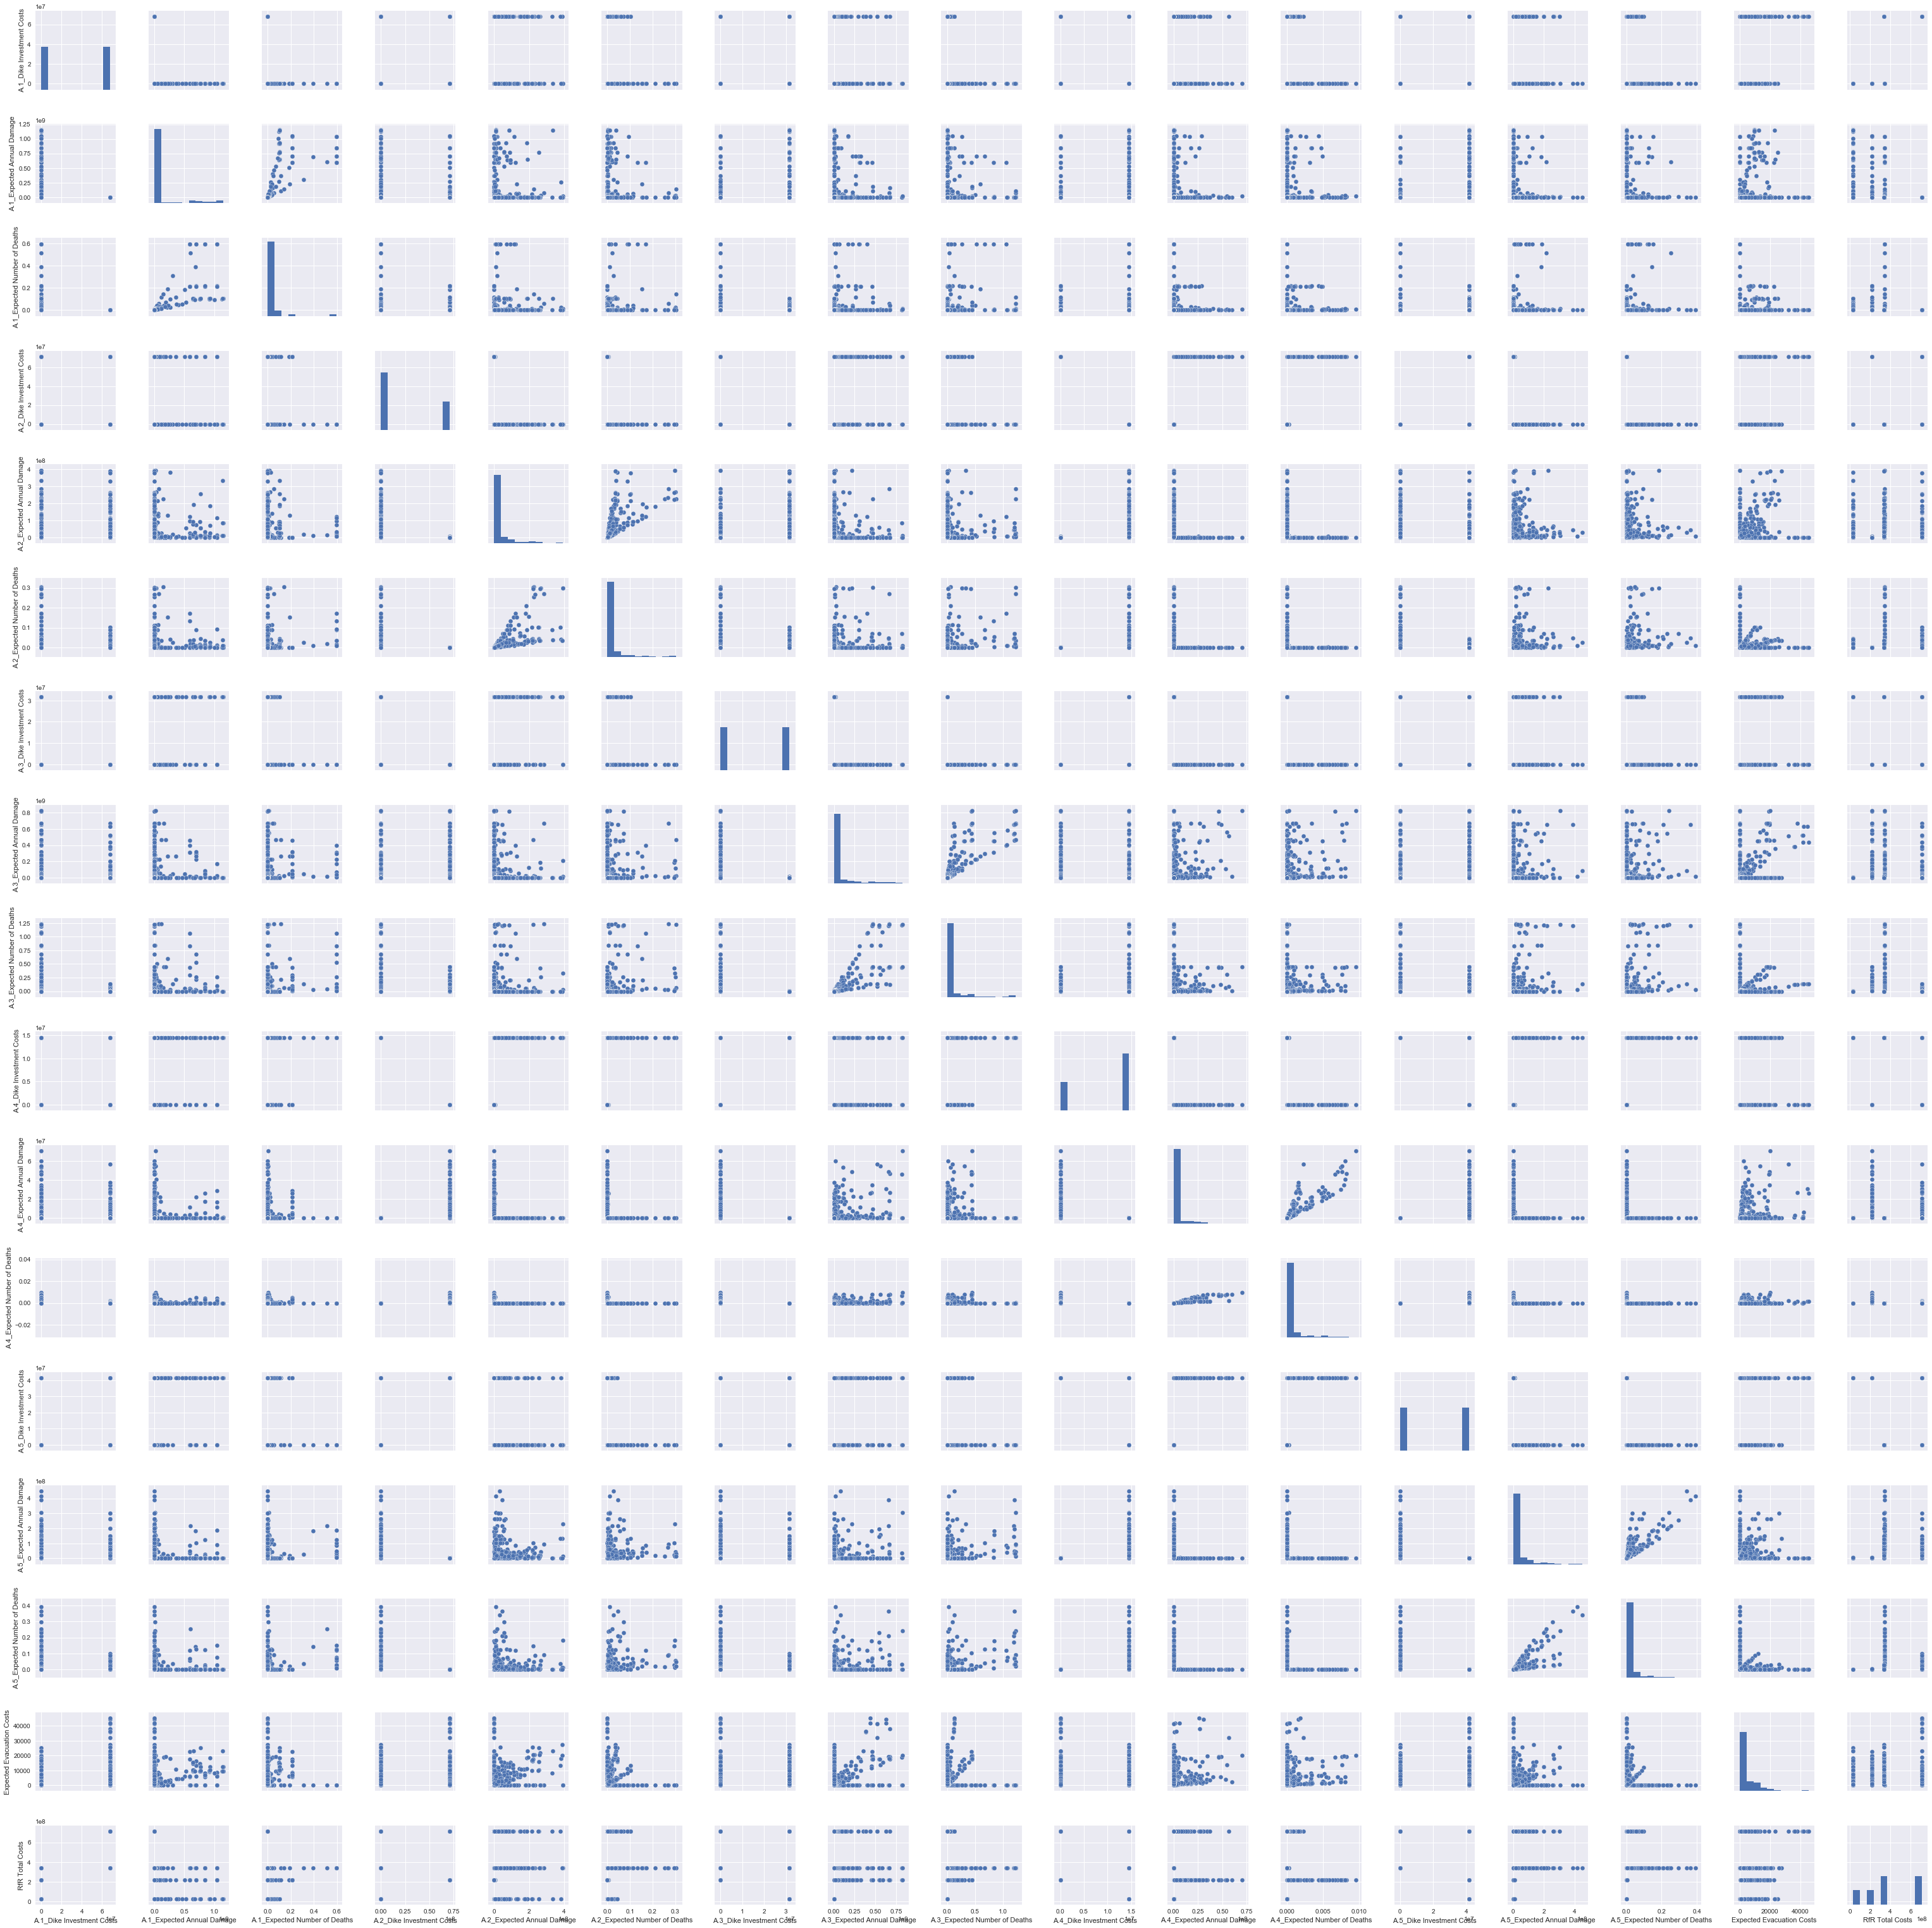

In [240]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

## The six policies are plotted against the 17 outcomes and we can see the solid bar charts are the otcomes of interest which the policies affect the most. 
The other graphs have no bar charts but points which show the scattered nature of the outcomes with respect to the policies levers.

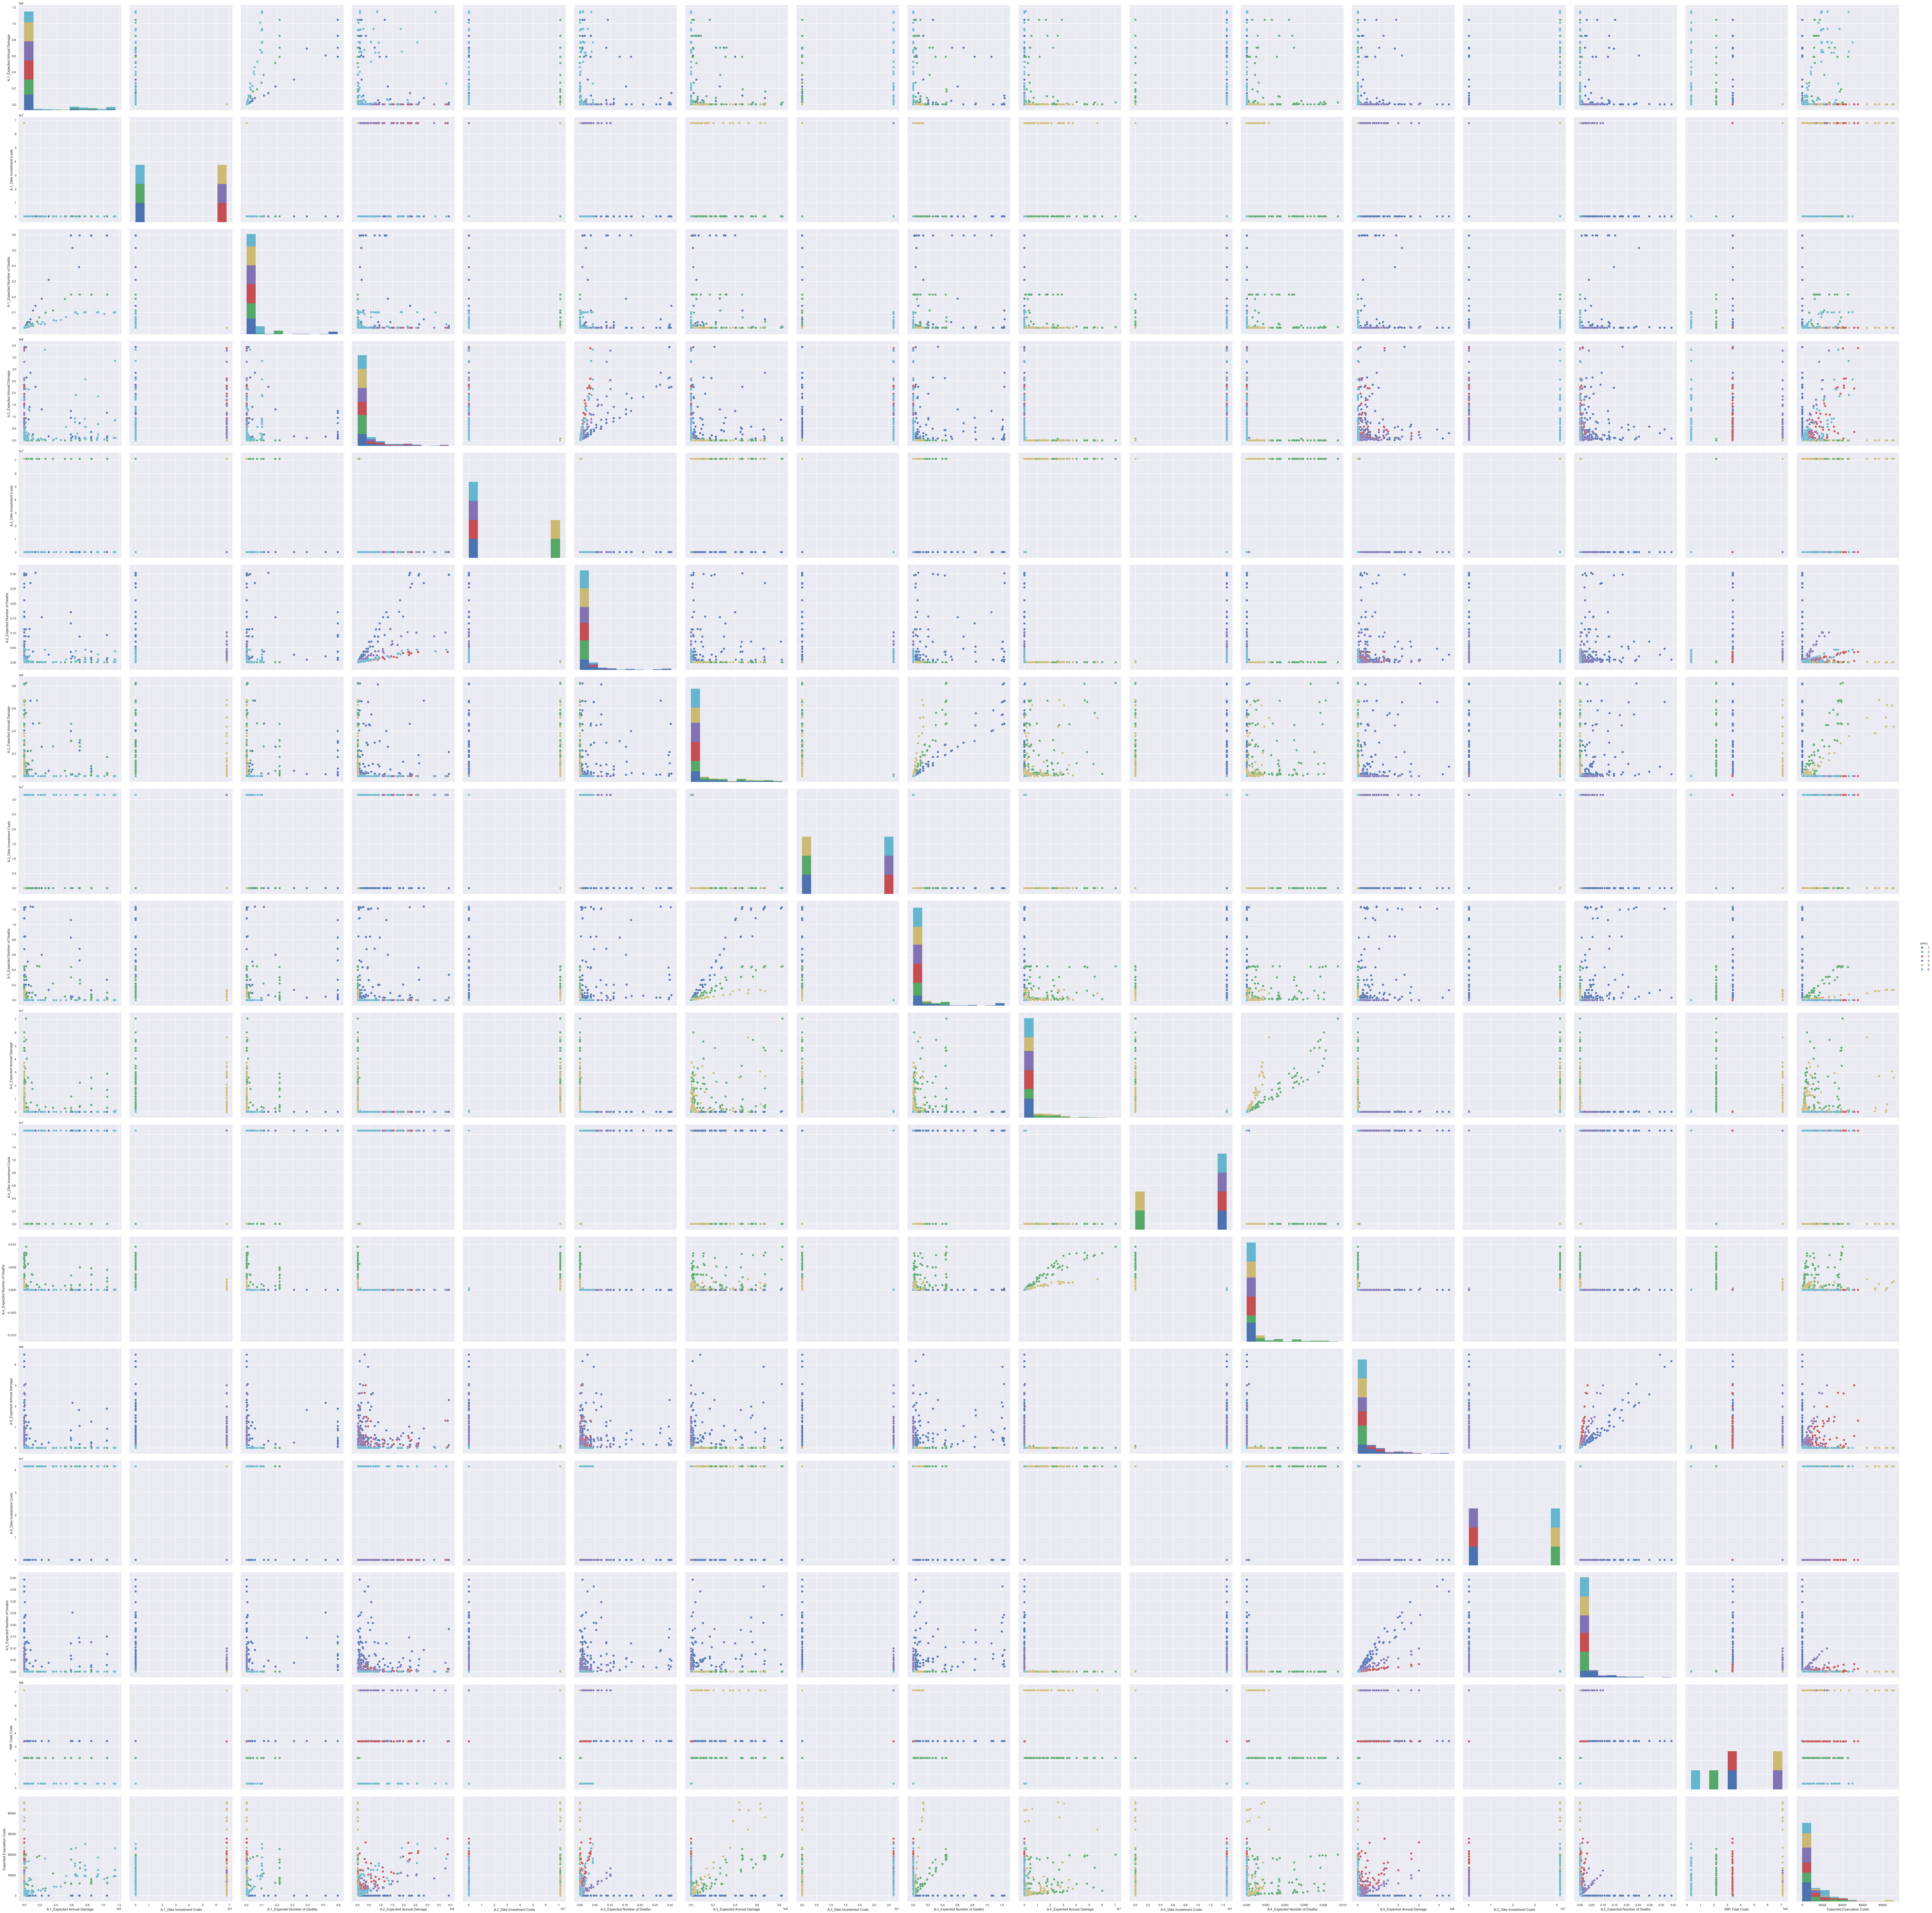

In [241]:
policy = np.copy(experiments["policy"])
for i, entry in enumerate(set(policy)):
    logical = policy==entry
    policy[logical] = str(i+1)

data = copy.copy(outcomes)
data["policy"] = policy
data = pd.DataFrame.from_dict(data)
sns.pairplot(data, hue="policy", vars=outcomes.keys(), size=5)
plt.show()

## Dataframes of Deaths Costs and Damages are created by slicing the outcomes dataframe.

In [242]:
def slice_endswith(sourcedict, string):
    newdict = {}
    for key in sourcedict.keys():
        if key.endswith(string):
            newdict[key] = sourcedict[key]
    return newdict

def slice_startswith(sourcedict, string):
    newdict = {}
    for key in sourcedict.keys():
        if key.startswith(string):
            newdict[key] = sourcedict[key]
    return newdict

Deaths = pd.DataFrame(slice_endswith(outcomes, "Deaths"))
Costs = pd.DataFrame(slice_endswith(outcomes, "Costs"))
Damage = pd.DataFrame(slice_endswith(outcomes, "Damage"))
A1 = pd.DataFrame(slice_startswith(outcomes, "A.1"))
A2 = pd.DataFrame(slice_startswith(outcomes, "A.2"))
A3 = pd.DataFrame(slice_startswith(outcomes, "A.3"))
A4 = pd.DataFrame(slice_startswith(outcomes, "A.4"))
A5 = pd.DataFrame(slice_startswith(outcomes, "A.5"))

In [243]:
Deaths

A.1_Expected Number of Deaths  A.2_Expected Number of Deaths  \
0                         0.000000                       0.254311   
1                         0.595242                       0.008792   
2                         0.000000                       0.008557   
3                         0.594729                       0.131966   
4                         0.004840                       0.008779   
5                         0.000000                       0.002964   
6                         0.054045                       0.269223   
7                         0.000000                       0.025526   
8                         0.004544                       0.111852   
9                         0.022436                       0.299471   
10                        0.000000                       0.153633   
11                        0.000000                       0.025781   
12                        0.595187                       0.014250   
13                        0.000000                       0.025277   
14                        0.594982                       0.008718   
15                        0.000000                       0.053953   
16                        0.012214                       0.002954   
17                        0.000760                       0.008577   
18                        0.000000                       0.294959   
19                        0.000000                       0.045650   
20                        0.000000                       0.068974   
21                        0.016873                       0.012998   
22                        0.000000                       0.035579   
23                        0.000000                       0.004508   
24                        0.594898                       0.008672   
25                        0.594738                       0.170066   
26                        0.594974                       0.013266   
27                        0.000000                       0.008622   
28                        0.000000                       0.002938   
29                        0.012399                       0.008686   
..                             ...                            ...   
570                       0.000000                       0.000447   
571                       0.000000                       0.001891   
572                       0.000000                       0.008897   
573                       0.000000                       0.018452   
574                       0.000000                       0.023864   
575                       0.000000                       0.004106   
576                       0.000000                       0.008754   
577                       0.000000                       0.001832   
578                       0.000000                       0.006274   
579                       0.000000                       0.003035   
580                       0.000000                       0.023966   
581                       0.000000                       0.003017   
582                       0.000000                       0.001040   
583                       0.000000                       0.024083   
584                       0.000000                       0.001839   
585                       0.000000                       0.018610   
586                       0.000000                       0.002967   
587                       0.000000                       0.001525   
588                       0.000000                       0.001573   
589                       0.000000                       0.004193   
590                       0.000000                       0.012311   
591                       0.000000                       0.004127   
592                       0.000000                       0.003043   
593                       0.000000                       0.004161   
594                       0.000000                       0.001030   
595                       0.000000                       0.004973   
596

In [244]:
Costs

A.1_Dike Investment Costs  A.2_Dike Investment Costs  \
0                 0.000000e+00                        0.0   
1                 0.000000e+00                        0.0   
2                 0.000000e+00                        0.0   
3                 0.000000e+00                        0.0   
4                 0.000000e+00                        0.0   
5                 0.000000e+00                        0.0   
6                 0.000000e+00                        0.0   
7                 0.000000e+00                        0.0   
8                 0.000000e+00                        0.0   
9                 0.000000e+00                        0.0   
10                0.000000e+00                        0.0   
11                0.000000e+00                        0.0   
12                0.000000e+00                        0.0   
13                0.000000e+00                        0.0   
14                0.000000e+00                        0.0   
15                0.000000e+00                        0.0   
16                0.000000e+00                        0.0   
17                0.000000e+00                        0.0   
18                0.000000e+00                        0.0   
19                0.000000e+00                        0.0   
20                0.000000e+00                        0.0   
21                0.000000e+00                        0.0   
22                0.000000e+00                        0.0   
23                0.000000e+00                        0.0   
24                0.000000e+00                        0.0   
25                0.000000e+00                        0.0   
26                0.000000e+00                        0.0   
27                0.000000e+00                        0.0   
28                0.000000e+00                        0.0   
29                0.000000e+00                        0.0   
..                         ...                        ...   
570               6.796590e+07                        0.0   
571               6.796590e+07                        0.0   
572               6.796590e+07                        0.0   
573               6.796590e+07                        0.0   
574               6.796590e+07                        0.0   
575               6.796590e+07                        0.0   
576               6.796590e+07                        0.0   
577               6.796590e+07                        0.0   
578               6.796590e+07                        0.0   
579               6.796590e+07                        0.0   
580               6.796590e+07                        0.0   
581               6.796590e+07                        0.0   
582               6.796590e+07                        0.0   
583               6.796590e+07                        0.0   
584               6.796590e+07                        0.0   
585               6.796590e+07                        0.0   
586               6.796590e+07                        0.0   
587               6.796590e+07                        0.0   
588               6.796590e+07                        0.0   
589               6.796590e+07                        0.0   
590               6.796590e+07                        0.0   
591               6.796590e+07                        0.0   
592               6.796590e+07                        0.0   
593               6.796590e+07                        0.0   
594               6.796590e+07                        0.0   
595               6.796590e+07                        0.0   
596               6.796590e+07                        0.0   
597               6.796590e+07                        0.0   
598               6.796590e+07                        0.0   
599               6.796590e+07                        0.0   

     A.3_Dike Investment Costs  A.4_Dike Investment Costs  \
0                 0.000000e+00               1.456712e+07   
1                 0.000000e+00               1.456712e+07   
2                 0.000000e+00         

In [245]:
Damage

A.1_Expected Annual Damage  A.2_Expected Annual Damage  \
0                  0.000000e+00                2.263239e+08   
1                  7.001647e+08                6.696070e+06   
2                  0.000000e+00                9.850954e+06   
3                  5.895127e+08                9.435001e+07   
4                  6.580856e+06                8.090637e+06   
5                  0.000000e+00                2.241026e+06   
6                  7.657683e+07                2.842995e+08   
7                  0.000000e+00                3.019323e+07   
8                  5.171233e+06                9.369785e+07   
9                  2.620894e+07                2.648144e+08   
10                 0.000000e+00                1.099134e+08   
11                 0.000000e+00                2.033694e+07   
12                 1.044687e+09                1.648100e+07   
13                 0.000000e+00                1.696370e+07   
14                 1.044407e+09                9.947303e+06   
15                 0.000000e+00                6.553631e+07   
16                 1.720491e+07                2.704607e+06   
17                 1.032517e+06                7.992576e+06   
18                 0.000000e+00                2.621544e+08   
19                 0.000000e+00                4.498652e+07   
20                 0.000000e+00                4.812979e+07   
21                 2.945541e+07                1.521802e+07   
22                 0.000000e+00                2.415160e+07   
23                 0.000000e+00                5.084152e+06   
24                 8.462518e+08                8.038648e+06   
25                 5.895194e+08                1.230819e+08   
26                 5.897013e+08                8.683475e+06   
27                 0.000000e+00                6.627742e+06   
28                 0.000000e+00                3.328063e+06   
29                 2.148508e+07                9.928189e+06   
..                          ...                         ...   
570                0.000000e+00                1.412477e+06   
571                0.000000e+00                4.878075e+06   
572                0.000000e+00                1.989757e+07   
573                0.000000e+00                4.245993e+07   
574                0.000000e+00                8.294573e+07   
575                0.000000e+00                7.616651e+06   
576                0.000000e+00                1.660695e+07   
577                0.000000e+00                4.798688e+06   
578                0.000000e+00                2.065113e+07   
579                0.000000e+00                5.519571e+06   
580                0.000000e+00                5.574688e+07   
581                0.000000e+00                5.502484e+06   
582                0.000000e+00                1.862638e+06   
583                0.000000e+00                6.762967e+07   
584                0.000000e+00                3.349632e+06   
585                0.000000e+00                4.269669e+07   
586                0.000000e+00                6.474578e+06   
587                0.000000e+00                3.988216e+06   
588                0.000000e+00                2.823310e+06   
589                0.000000e+00                1.363510e+07   
590                0.000000e+00                2.796522e+07   
591                0.000000e+00                1.096017e+07   
592                0.000000e+00                7.931580e+06   
593                0.000000e+00                9.101344e+06   
594                0.000000e+00                1.852845e+06   
595                0.000000e+00                1.314341e+07   
596                0.000000e+00                1.860301e+08   
597                0.000000e+00                2.405525e+07   
598                0.000000e+00                1.081749e+08   
599                0.000000e+00                4.061481e+06   

     A.3_Expected Annual Damage  A.4_Expected Annual Damage  \
0                  1.252921e+07    

## Heatmap for 17 outcomes
The heatmap gives an idea about the severity of the effects that the outcomes have. This can be seen from the colours. 

In [246]:
import pandas as pd
df = np.copy(experiments["policy"])
df = pd.DataFrame.from_dict(df)
df_policies = df[0]

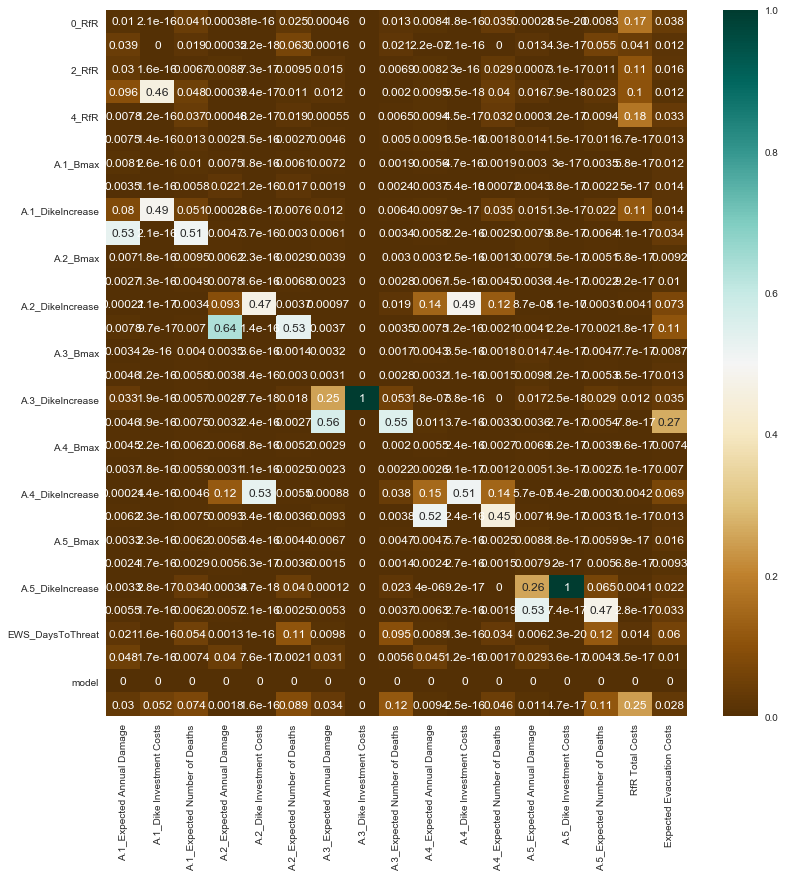

In [247]:
from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
ax = sns.heatmap(fs, cmap='BrBG', annot = True)
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.show()

# PRIM analysis. 
This gives us the idea that to reduce deaths the most important parameters are Dike increase, Bmax and pfail. This is in consistence with the sensitivity analysis below

In [248]:
from ema_workbench.analysis import prim

x = experiments
y = []
for i in range(len(Deaths)):
    y.append(sum(Deaths.iloc[i,:]))
y = np.array(y)

prim_alg = prim.Prim(x,y, threshold=0.0001)
set1 = prim_alg.find_box()

[MainProcess/INFO] 600 points remaining, containing 599 cases of interest
[MainProcess/INFO] mean: 1.1492045002586697, mass: 0.051666666666666666, coverage: 0.05175292153589316, density: 1.0 restricted_dimensions: 8


    coverage   density      mass      mean res dim
0   1.000000  0.998333  1.000000  0.145465       0
1   0.333890  1.000000  0.333333  0.318314       1
2   0.166945  1.000000  0.166667  0.589175       2
3   0.158598  1.000000  0.158333  0.602387       3
4   0.150250  1.000000  0.150000  0.616746       4
5   0.143573  1.000000  0.143333  0.628122       5
6   0.135225  1.000000  0.135000  0.641897       6
7   0.126878  1.000000  0.126667  0.669620       6
8   0.120200  1.000000  0.120000  0.686595       7
9   0.113523  1.000000  0.113333  0.701073       8
10  0.106845  1.000000  0.106667  0.717828       8
11  0.100167  1.000000  0.100000  0.742564       8
12  0.095159  1.000000  0.095000  0.776559       8
13  0.090150  1.000000  0.090000  0.796037       8
14  0.085142  1.000000  0.085000  0.832639       8
15  0.080134  1.000000  0.080000  0.873403       8
16  0.075125  1.000000  0.075000  0.918811       8
17  0.070117  1.000000  0.070000  0.968077       8
18  0.065109  1.000000  0.06500

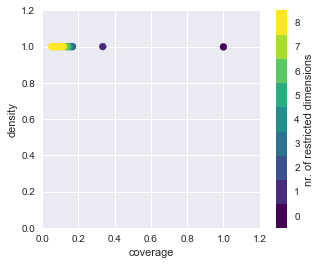

In [286]:
set1.show_tradeoff()
set1.write_ppt_to_stdout()

coverage    0.143573
density            1
mass        0.143333
mean        0.628122
res dim            5
Name: 5, dtype: object

                             box 5                                      
                               min         max                 qp values
1_RfR                     0.000000    0.000000  [2.2637428775631125e-48]
A.3_DikeIncrease          0.000000    0.000000   [2.258033018379285e-41]
A.4_Bmax                 30.522310  333.732594    [4.20472310533649e-19]
A.5_pfail                 0.008971    0.946710   [4.850778688220393e-19]
A.0_ID flood wave shape   9.000000  132.000000   [8.894635923130754e-19]

coverage     0.15025
density            1
mass            0.15
mean        0.616746
res dim            4
Name: 4, dtype: object

                      box 4                                      
                        min         max                 qp values
1_RfR              0.000000    0.000000  [2.1526082192102554e-51]
A.3_DikeIncrease   0.000000    0

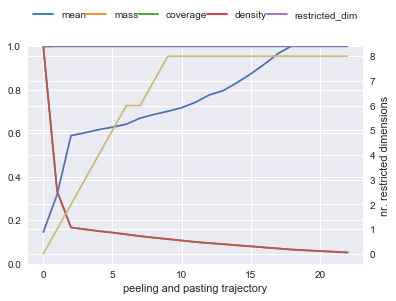

In [287]:
set1.show_ppt()
set1.inspect(5)
set1.inspect(4)
set1.inspect(2)

In [251]:
Costs.columns

Index(['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs',
       'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs',
       'A.5_Dike Investment Costs', 'Expected Evacuation Costs',
       'RfR Total Costs'],
      dtype='object')

The costs for increasing the height of a dike are calculated using a simple for loop. This value is then added to the colum of Deaths and Damages which were the dataframes created above.

In [288]:
exp = pd.DataFrame(experiments)
out = pd.DataFrame(outcomes)
res = pd.concat((exp, out), axis = 1)
dfcosts = res[Costs.columns]
dfcosts['DikeHeightincreaseCosts'] = np.nan
for i in range(len(dfcosts)):
    dfcosts['DikeHeightincreaseCosts'][i] = dfcosts.sum(axis = 1)[i]
dfcosts

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Varun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


A.1_Dike Investment Costs  A.2_Dike Investment Costs  \
0                 0.000000e+00                        0.0   
1                 0.000000e+00                        0.0   
2                 0.000000e+00                        0.0   
3                 0.000000e+00                        0.0   
4                 0.000000e+00                        0.0   
5                 0.000000e+00                        0.0   
6                 0.000000e+00                        0.0   
7                 0.000000e+00                        0.0   
8                 0.000000e+00                        0.0   
9                 0.000000e+00                        0.0   
10                0.000000e+00                        0.0   
11                0.000000e+00                        0.0   
12                0.000000e+00                        0.0   
13                0.000000e+00                        0.0   
14                0.000000e+00                        0.0   
15                0.000000e+00                        0.0   
16                0.000000e+00                        0.0   
17                0.000000e+00                        0.0   
18                0.000000e+00                        0.0   
19                0.000000e+00                        0.0   
20                0.000000e+00                        0.0   
21                0.000000e+00                        0.0   
22                0.000000e+00                        0.0   
23                0.000000e+00                        0.0   
24                0.000000e+00                        0.0   
25                0.000000e+00                        0.0   
26                0.000000e+00                        0.0   
27                0.000000e+00                        0.0   
28                0.000000e+00                        0.0   
29                0.000000e+00                        0.0   
..                         ...                        ...   
570               6.796590e+07                        0.0   
571               6.796590e+07                        0.0   
572               6.796590e+07                        0.0   
573               6.796590e+07                        0.0   
574               6.796590e+07                        0.0   
575               6.796590e+07                        0.0   
576               6.796590e+07                        0.0   
577               6.796590e+07                        0.0   
578               6.796590e+07                        0.0   
579               6.796590e+07                        0.0   
580               6.796590e+07                        0.0   
581               6.796590e+07                        0.0   
582               6.796590e+07                        0.0   
583               6.796590e+07                        0.0   
584               6.796590e+07                        0.0   
585               6.796590e+07                        0.0   
586               6.796590e+07                        0.0   
587               6.796590e+07                        0.0   
588               6.796590e+07                        0.0   
589               6.796590e+07                        0.0   
590               6.796590e+07                        0.0   
591               6.796590e+07                        0.0   
592               6.796590e+07                        0.0   
593               6.796590e+07                        0.0   
594               6.796590e+07                        0.0   
595               6.796590e+07                        0.0   
596               6.796590e+07                        0.0   
597               6.796590e+07                        0.0   
598               6.796590e+07                        0.0   
599               6.796590e+07                        0.0   

     A.3_Dike Investment Costs  A.4_Dike Investment Costs  \
0                 0.000000e+00               1.456712e+07   
1                 0.000000e+00               1.456712e+07   
2                 0.000000e+00         

In [289]:
res[Damage.columns]

A.1_Expected Annual Damage  A.2_Expected Annual Damage  \
0                  0.000000e+00                2.263239e+08   
1                  7.001647e+08                6.696070e+06   
2                  0.000000e+00                9.850954e+06   
3                  5.895127e+08                9.435001e+07   
4                  6.580856e+06                8.090637e+06   
5                  0.000000e+00                2.241026e+06   
6                  7.657683e+07                2.842995e+08   
7                  0.000000e+00                3.019323e+07   
8                  5.171233e+06                9.369785e+07   
9                  2.620894e+07                2.648144e+08   
10                 0.000000e+00                1.099134e+08   
11                 0.000000e+00                2.033694e+07   
12                 1.044687e+09                1.648100e+07   
13                 0.000000e+00                1.696370e+07   
14                 1.044407e+09                9.947303e+06   
15                 0.000000e+00                6.553631e+07   
16                 1.720491e+07                2.704607e+06   
17                 1.032517e+06                7.992576e+06   
18                 0.000000e+00                2.621544e+08   
19                 0.000000e+00                4.498652e+07   
20                 0.000000e+00                4.812979e+07   
21                 2.945541e+07                1.521802e+07   
22                 0.000000e+00                2.415160e+07   
23                 0.000000e+00                5.084152e+06   
24                 8.462518e+08                8.038648e+06   
25                 5.895194e+08                1.230819e+08   
26                 5.897013e+08                8.683475e+06   
27                 0.000000e+00                6.627742e+06   
28                 0.000000e+00                3.328063e+06   
29                 2.148508e+07                9.928189e+06   
..                          ...                         ...   
570                0.000000e+00                1.412477e+06   
571                0.000000e+00                4.878075e+06   
572                0.000000e+00                1.989757e+07   
573                0.000000e+00                4.245993e+07   
574                0.000000e+00                8.294573e+07   
575                0.000000e+00                7.616651e+06   
576                0.000000e+00                1.660695e+07   
577                0.000000e+00                4.798688e+06   
578                0.000000e+00                2.065113e+07   
579                0.000000e+00                5.519571e+06   
580                0.000000e+00                5.574688e+07   
581                0.000000e+00                5.502484e+06   
582                0.000000e+00                1.862638e+06   
583                0.000000e+00                6.762967e+07   
584                0.000000e+00                3.349632e+06   
585                0.000000e+00                4.269669e+07   
586                0.000000e+00                6.474578e+06   
587                0.000000e+00                3.988216e+06   
588                0.000000e+00                2.823310e+06   
589                0.000000e+00                1.363510e+07   
590                0.000000e+00                2.796522e+07   
591                0.000000e+00                1.096017e+07   
592                0.000000e+00                7.931580e+06   
593                0.000000e+00                9.101344e+06   
594                0.000000e+00                1.852845e+06   
595                0.000000e+00                1.314341e+07   
596                0.000000e+00                1.860301e+08   
597                0.000000e+00                2.405525e+07   
598                0.000000e+00                1.081749e+08   
599                0.000000e+00                4.061481e+06   

     A.3_Expected Annual Damage  A.4_Expected Annual Damage  \
0                  1.252921e+07    

In [290]:
res[Deaths.columns]

A.1_Expected Number of Deaths  A.2_Expected Number of Deaths  \
0                         0.000000                       0.254311   
1                         0.595242                       0.008792   
2                         0.000000                       0.008557   
3                         0.594729                       0.131966   
4                         0.004840                       0.008779   
5                         0.000000                       0.002964   
6                         0.054045                       0.269223   
7                         0.000000                       0.025526   
8                         0.004544                       0.111852   
9                         0.022436                       0.299471   
10                        0.000000                       0.153633   
11                        0.000000                       0.025781   
12                        0.595187                       0.014250   
13                        0.000000                       0.025277   
14                        0.594982                       0.008718   
15                        0.000000                       0.053953   
16                        0.012214                       0.002954   
17                        0.000760                       0.008577   
18                        0.000000                       0.294959   
19                        0.000000                       0.045650   
20                        0.000000                       0.068974   
21                        0.016873                       0.012998   
22                        0.000000                       0.035579   
23                        0.000000                       0.004508   
24                        0.594898                       0.008672   
25                        0.594738                       0.170066   
26                        0.594974                       0.013266   
27                        0.000000                       0.008622   
28                        0.000000                       0.002938   
29                        0.012399                       0.008686   
..                             ...                            ...   
570                       0.000000                       0.000447   
571                       0.000000                       0.001891   
572                       0.000000                       0.008897   
573                       0.000000                       0.018452   
574                       0.000000                       0.023864   
575                       0.000000                       0.004106   
576                       0.000000                       0.008754   
577                       0.000000                       0.001832   
578                       0.000000                       0.006274   
579                       0.000000                       0.003035   
580                       0.000000                       0.023966   
581                       0.000000                       0.003017   
582                       0.000000                       0.001040   
583                       0.000000                       0.024083   
584                       0.000000                       0.001839   
585                       0.000000                       0.018610   
586                       0.000000                       0.002967   
587                       0.000000                       0.001525   
588                       0.000000                       0.001573   
589                       0.000000                       0.004193   
590                       0.000000                       0.012311   
591                       0.000000                       0.004127   
592                       0.000000                       0.003043   
593                       0.000000                       0.004161   
594                       0.000000                       0.001030   
595                       0.000000                       0.004973   
596

The total damages deaths and costs obtained from the tables above are plotted as histograms in order to gauge their frequency and thus determine the boundary up to which the system will not fail.

Text(0.5,1,'Total Cost \n(10% Boundary = 777762597.6189293)')

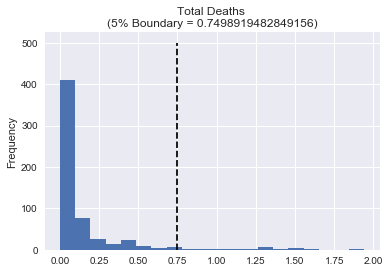

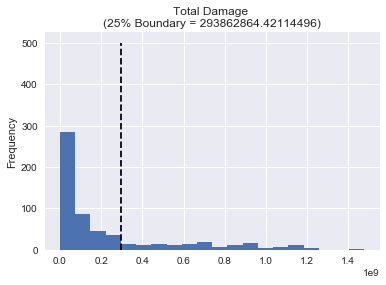

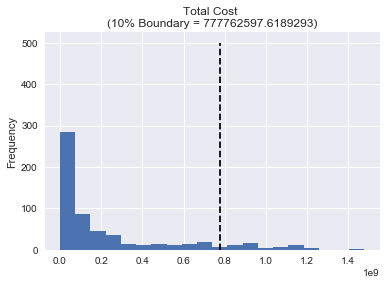

In [291]:
out['TotalDeaths'] = [sum(Deaths.iloc[i,:]) for i in range(len(out))]
fig, ax = plt.subplots()
q = out["TotalDeaths"].quantile(q=0.95)
q = np.round(q,20)
out["TotalDeaths"].plot(kind="hist", ax = ax, bins = 20)
ax.vlines(x=q,ymin=0,ymax=500,linestyle="--")
ax.set_title('Total Deaths \n(5% Boundary = {q})'.format(q=q))

out['TotalDamage'] = [sum(Damage.iloc[i,:]) for i in range(len(out))]
fig, ax = plt.subplots()
q = out["TotalDamage"].quantile(q=0.75)
q = np.round(q,20)
out["TotalDamage"].plot(kind="hist", ax = ax, bins = 20)
ax.vlines(x=q,ymin=0,ymax=500,linestyle="--")
ax.set_title('Total Damage \n(25% Boundary = {q})'.format(q=q))

out['TotalCost'] = [sum(Damage.iloc[i,:]) for i in range(len(out))]
fig, ax = plt.subplots()
q = out["TotalCost"].quantile(q=0.9)
q = np.round(q,20)
out["TotalCost"].plot(kind="hist", ax = ax, bins = 20)
ax.vlines(x=q,ymin=0,ymax=500,linestyle="--")
ax.set_title('Total Cost \n(10% Boundary = {q})'.format(q=q))

## Sensitivity Analysis 
Here the effects of Bmax pfail and on the number of deaths and damages are checked. This gives an idea about the drivers for this particular problem.

In [280]:
df_input = exp.iloc[:,5:29]
inputBmax = df_input[df_input.columns[df_input.columns.str.endswith('Bmax')]]
inputPfail = df_input[df_input.columns[df_input.columns.str.endswith('pfail')]]

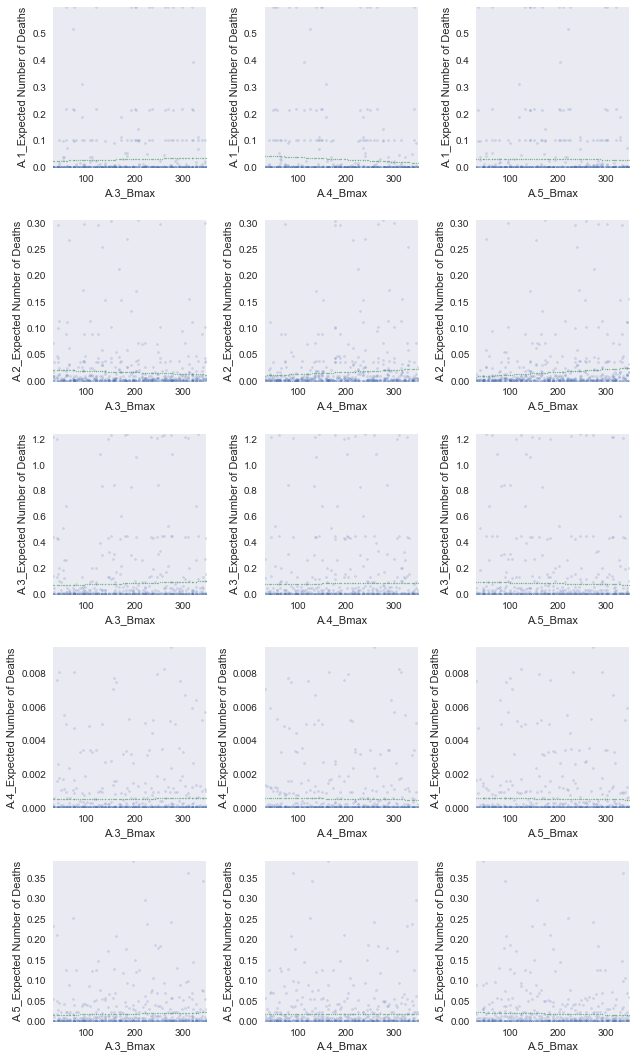

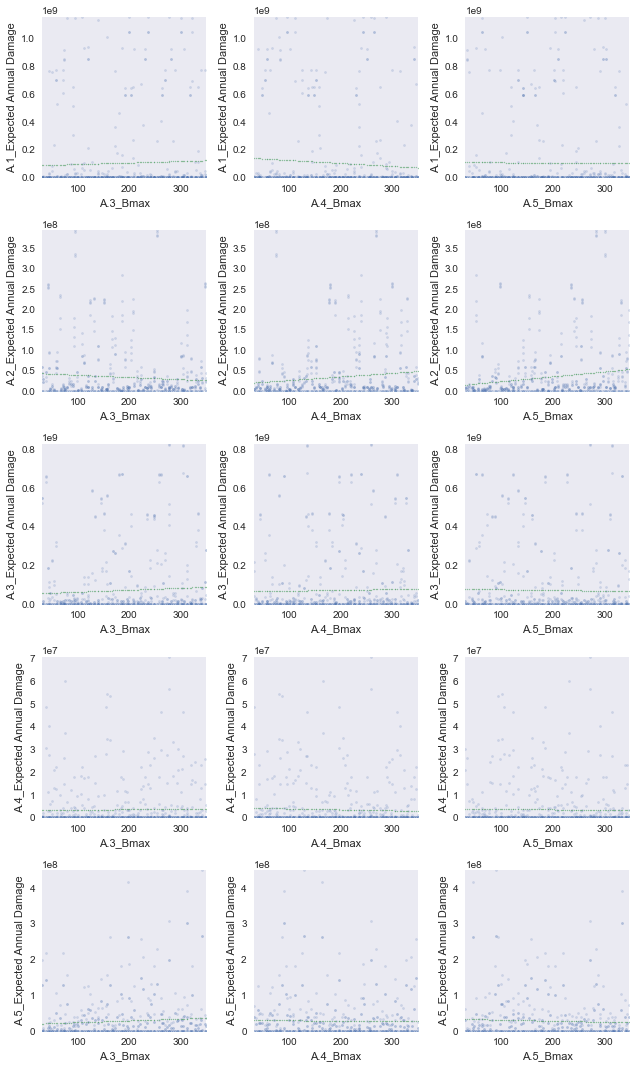

In [281]:
def regplot(xaxis, yaxis):
    nrows = yaxis.shape[1]
    ncols = xaxis.shape[1]

    fig, axes = plt.subplots(nrows=nrows,ncols=ncols,
                             figsize=(ncols*3, nrows*3))
    locs = list(itertools.product(range(nrows), range(ncols)))
    i = 0
    for outcome_ in yaxis:        
        for input_ in xaxis:
            loc = locs[i]
             #specify x and y
            x = xaxis[input_]
            y = yaxis[outcome_]
            #scatter
            axes[loc].scatter(x, y, s=5, alpha=0.2)

            #regression fit (1st)
            fit = np.polyfit(x, y, deg=1)
            f = lambda x: fit[0]*x + fit[1]
            axes[loc].scatter(x, f(x),s=1, alpha=0.1)

           
            axes[loc].set_xlabel(x.name)
            axes[loc].set_ylabel(y.name)
            axes[loc].set_xlim(x.min(), x.max())
            axes[loc].set_ylim(y.min(), y.max())
            axes[loc].grid()        

            i +=1
    fig.tight_layout()
    plt.show()

import itertools
regplot(inputBmax, Deaths)
regplot(inputBmax, Damage)


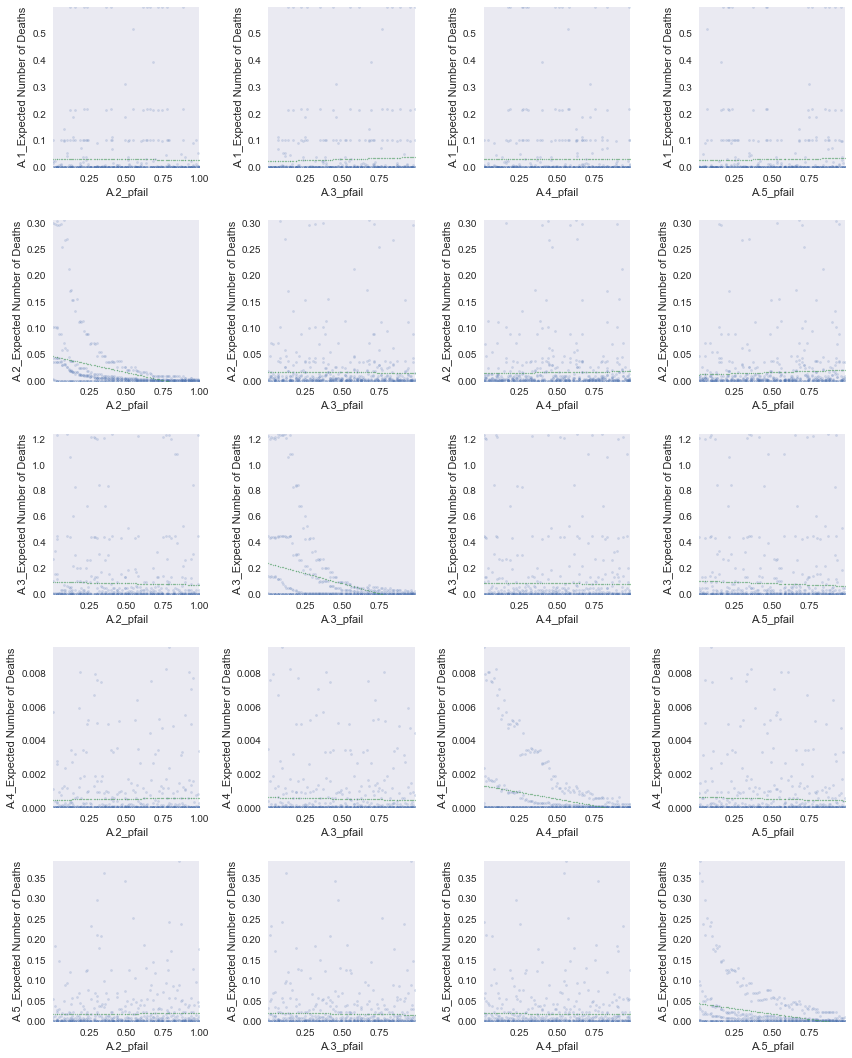

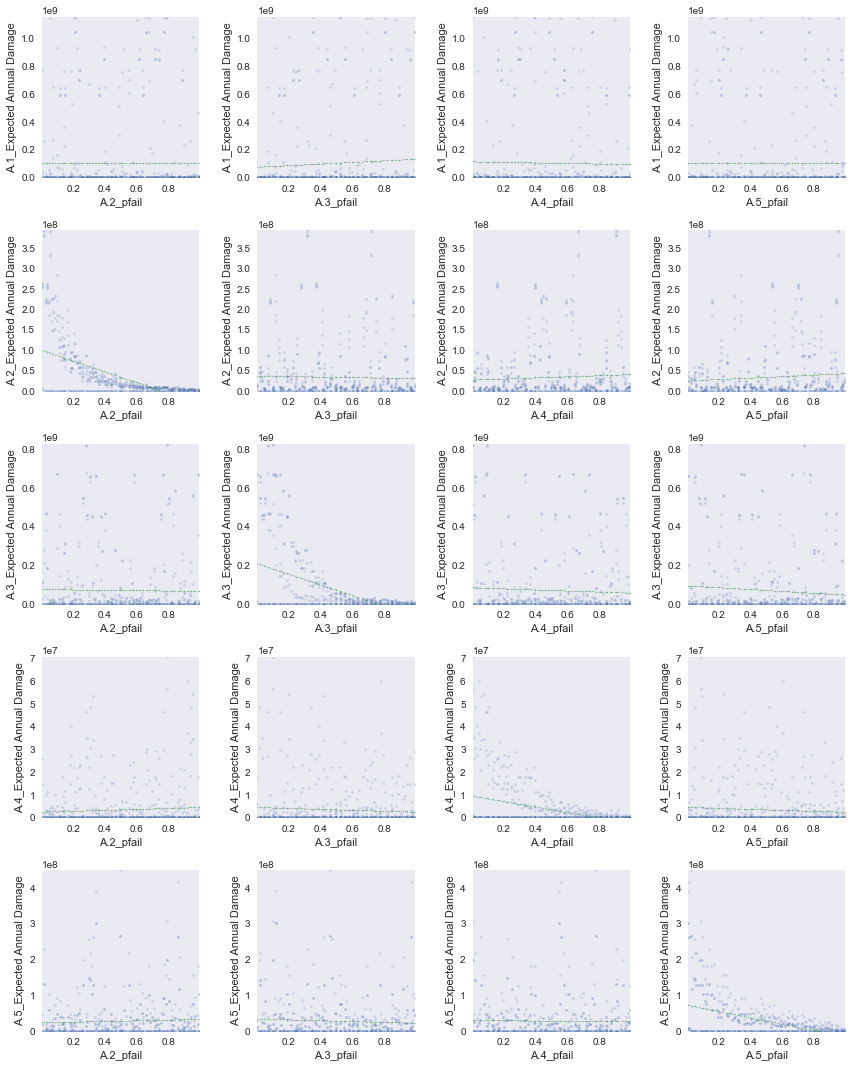

In [282]:
regplot(inputPfail, Deaths)
regplot(inputPfail, Damage)

## Zero Policy Defined

In [ ]:
noleversoutcome = pd.DataFrame(outcomes)

In [364]:
noleversoutcome.mean()

A.1_Dike Investment Costs        4.414185e+07
A.1_Expected Annual Damage       2.452666e+07
A.1_Expected Number of Deaths    7.664736e-03
A.2_Dike Investment Costs        4.802901e+07
A.2_Expected Annual Damage       9.172923e+06
A.2_Expected Number of Deaths    3.850116e-03
A.3_Dike Investment Costs        2.295822e+07
A.3_Expected Annual Damage       3.749085e+07
A.3_Expected Number of Deaths    3.648513e-02
A.4_Dike Investment Costs        9.112543e+06
A.4_Expected Annual Damage       2.455244e+06
A.4_Expected Number of Deaths    4.514345e-04
A.5_Dike Investment Costs        2.941814e+07
A.5_Expected Annual Damage       1.325530e+07
A.5_Expected Number of Deaths    4.195878e-03
Expected Evacuation Costs        2.230952e+03
RfR Total Costs                  3.552000e+08
Total Investment Costs           1.536598e+08
dtype: float64

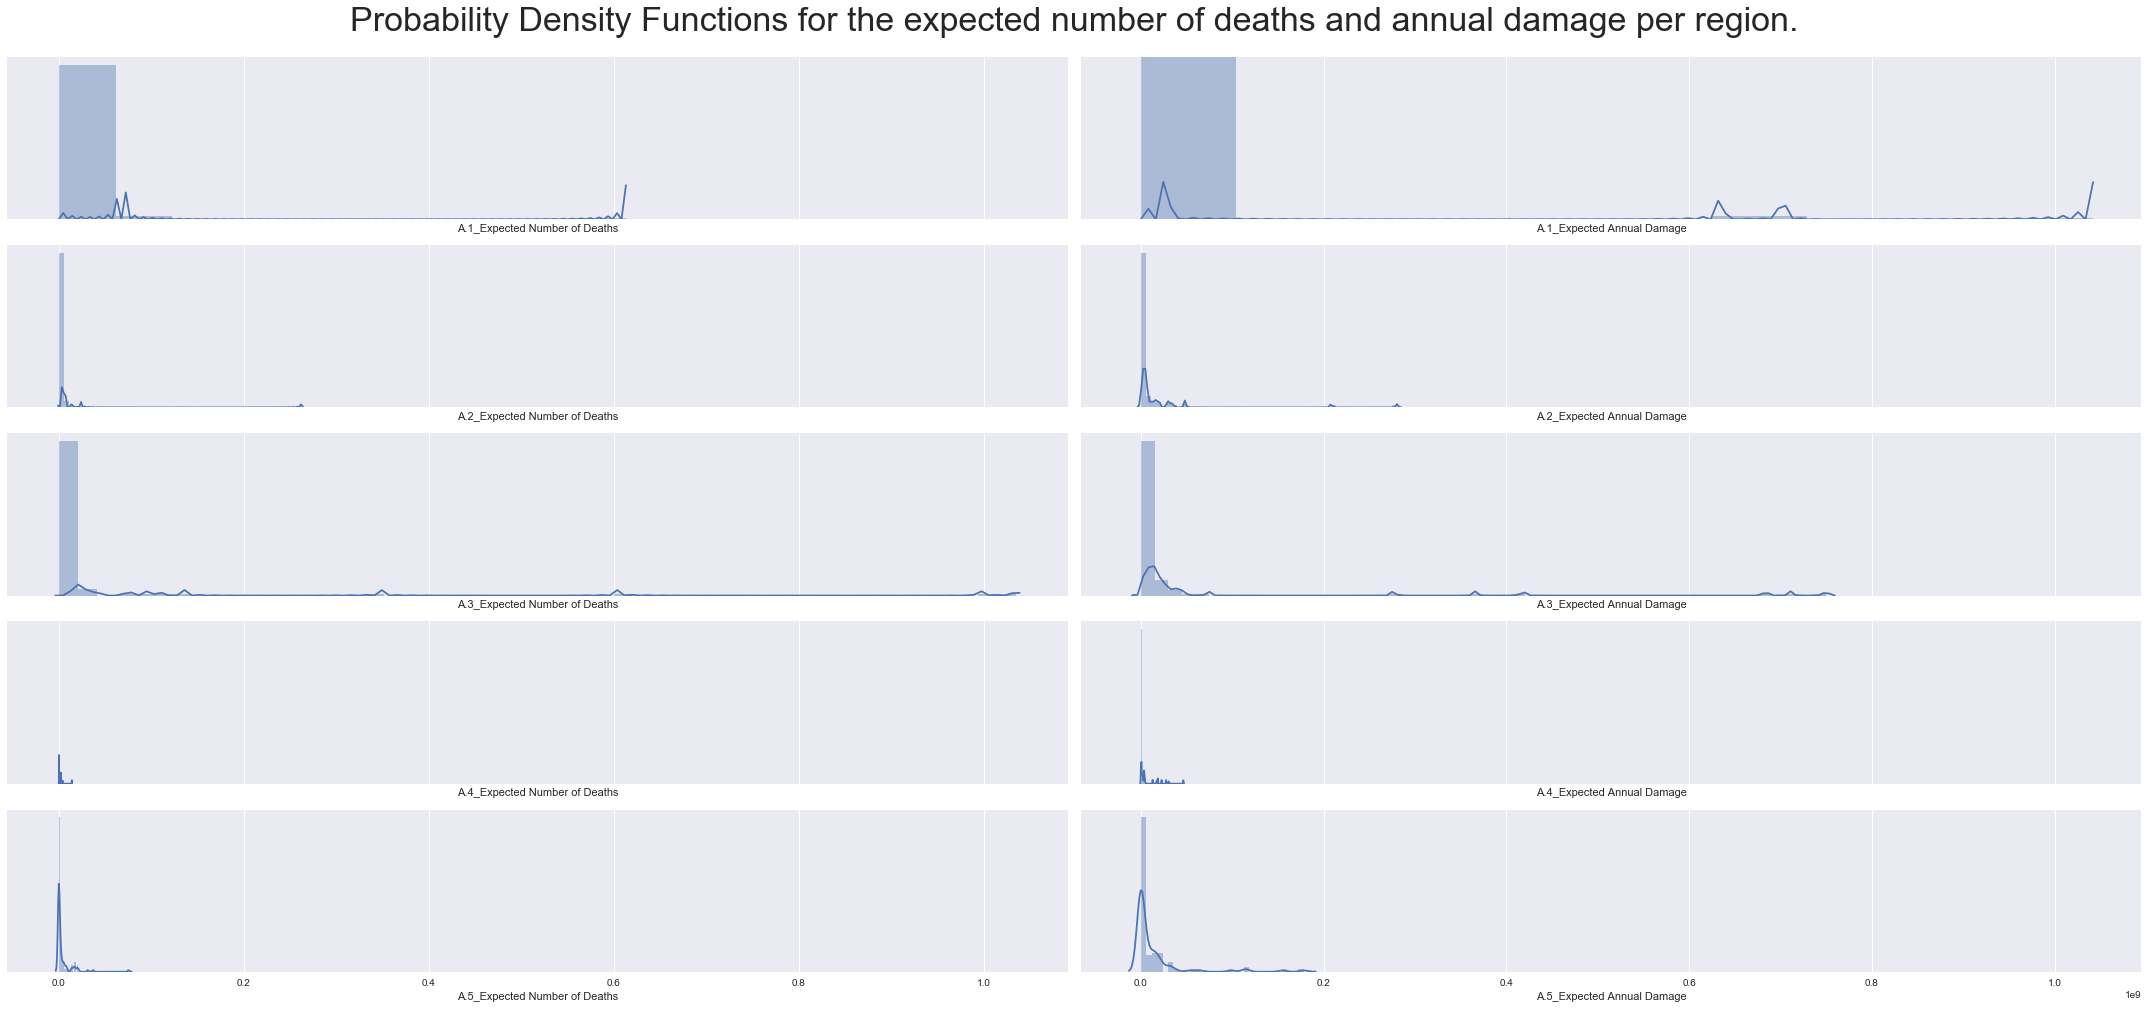

In [365]:
f,axes = plt.subplots(5,2,figsize=(30,14),sharex='col')
sns.despine(left=True)
sns.distplot(noleversoutcome['A.1_Expected Number of Deaths'],ax=axes[0,0])
sns.distplot(noleversoutcome['A.2_Expected Number of Deaths'],ax=axes[1,0])
sns.distplot(noleversoutcome['A.3_Expected Number of Deaths'],ax=axes[2,0])
sns.distplot(noleversoutcome['A.4_Expected Number of Deaths'],ax=axes[3,0])
sns.distplot(noleversoutcome['A.5_Expected Number of Deaths'],ax=axes[4,0])
sns.distplot(noleversoutcome['A.1_Expected Annual Damage'],ax=axes[0,1])
sns.distplot(noleversoutcome['A.2_Expected Annual Damage'],ax=axes[1,1])
sns.distplot(noleversoutcome['A.3_Expected Annual Damage'],ax=axes[2,1])
sns.distplot(noleversoutcome['A.4_Expected Annual Damage'],ax=axes[3,1])
sns.distplot(noleversoutcome['A.5_Expected Annual Damage'],ax=axes[4,1])
plt.setp(axes,yticks=[])
plt.suptitle('Probability Density Functions for the expected number of deaths and annual damage per region.',y=1,fontsize=34)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


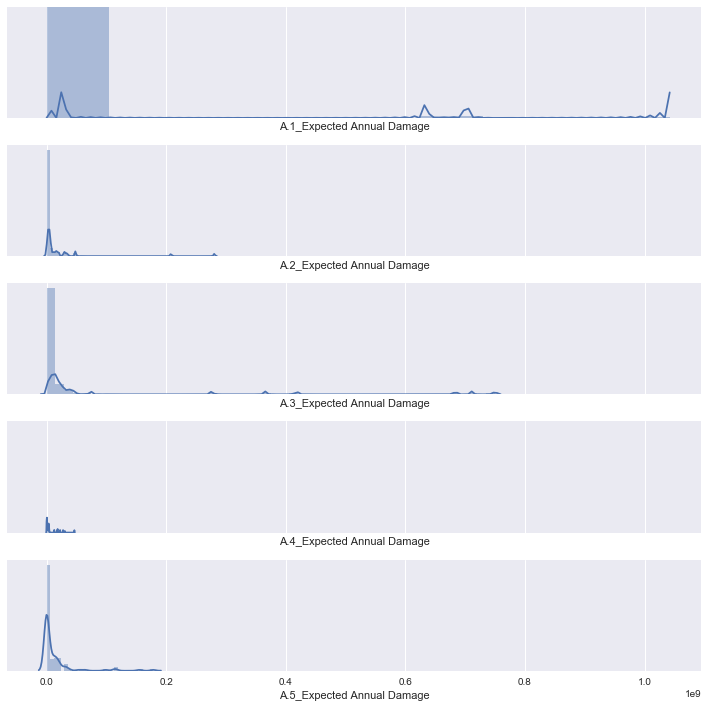

In [366]:
f,axes = plt.subplots(5,figsize=(10,10),sharex=True)
sns.despine(left=True)
sns.distplot(noleversoutcome['A.1_Expected Annual Damage'],ax=axes[0])
sns.distplot(noleversoutcome['A.2_Expected Annual Damage'],ax=axes[1])
sns.distplot(noleversoutcome['A.3_Expected Annual Damage'],ax=axes[2])
sns.distplot(noleversoutcome['A.4_Expected Annual Damage'],ax=axes[3])
sns.distplot(noleversoutcome['A.5_Expected Annual Damage'],ax=axes[4])
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()
